In [1]:
# A simple example of a fully connected deep neural network (FCN)
# The FCN trains on images of handwritten numbers from 0 to 9, then
# takes an image of a handwritten number and estimates which number
# it represents

In [15]:
# Import matplotlib to display digit images

import matplotlib.pyplot as plt

# Import PyTorch data used in example program

import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as xforms
from torch.autograd import Variable
import seaborn as sns
sns.set_style('whitegrid')

In [18]:
sns.set(rc={'figure.figsize':[8,6]})

In [10]:
input_size = 784  # The image size = 28x28 = 784
hidden_size = 500  # Number of nodes in the hidden layer
num_classes = 10  # Number of output classes (0..9)
num_epochs = 5  # Number of times DNN is trained on training dataset
batch_size = 100  # The size of input data for one iteration
learning_rate = 0.001  # The speed of convergence

In [11]:
# Read om training and test datasets, these are included as part of
# PyTorch's dataset repository

train_dataset = dsets.MNIST( root ='./data', train=True, transform=xforms.ToTensor(), download=True )
test_dataset = dsets.MNIST( root='./data', train=False, transform=xforms.ToTensor() )

5    0


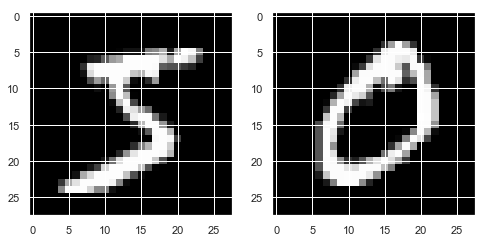

In [19]:
# Let's look at two of the images in the training dataset, and the
# corresponding label (which defines the number the image represents)

# Grab the first two images and corresponding numbers they represent
# from the training set

img_0, val_0 = train_dataset[ 0 ]
img_1, val_1 = train_dataset[ 1 ]

# Print out what numbers the two images are meant to represent

print( val_0, '  ', val_1 )

# Create a single row of two images, place first image in the first
# image position

plt.subplot( 1, 2, 1 )
plt.imshow( img_0.numpy()[ 0 ], cmap='gray' )

# Place the second image in the second image position

plt.subplot( 1, 2, 2 )
plt.imshow( img_1.numpy()[ 0 ], cmap='gray' )

In [20]:
# Create training and test dataloaders, these will load and cache data of batch_size during
# looping, training data is shuffled randomly, test data is not

train_loader = torch.utils.data.DataLoader( dataset=train_dataset, batch_size=batch_size, shuffle=True )
test_loader = torch.utils.data.DataLoader( dataset=test_dataset, batch_size=batch_size, shuffle=False )

In [23]:
net = nn.Sequential(
  nn.Linear( input_size, hidden_size ),  # fully connected layer, 784 (input data) -> 500 (hidden layer)
  nn.ReLU(),  # Rectified liner unit filter, max( 0, x )
  nn.Linear( hidden_size, num_classes )  # output layer, 500 (hidden layer) -> 10 (output classes)
)

#net.cuda()  # Uncomment to enable GPU computation

In [24]:
# Choose a cross-entropy loss function to use during evaluation of DNN performance, and an
# Adam optimizer (Adam, see https://arxiv.org/abs/1412.6980) to update DNN weights

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam( net.parameters(), lr=learning_rate )

In [25]:
# Train the DNN

for epoch in range( 0, num_epochs ):  # For each of the five epochs
    
    for i, (images, labels) in enumerate( train_loader ):  # For each of the 100-image batches
        
        images = Variable( images.view( -1, 28 * 28 ))  # Convert torch tensor to Variable, from 784-pix image to 28x28 matrix
        labels = Variable( labels )  # Grab pre-assigned labels for each of the 100 images
        
        optimizer.zero_grad()  # Zero gradients for current pass
        outputs = net( images )  # Forward pass, compute output class for given image
        loss = criterion( outputs, labels )  # Compute loss, difference between estimated label and actual label
        loss.backward()  # Backpropegation, compute improved weights
        optimizer.step()  # Update weights of hidden nodes
        
        if ( i + 1 ) % 100 == 0:  # Log message
            print( 'Epoch [%d/%d], Step [%d/%d], Loss: %.4f' % ( epoch + 1, num_epochs, i + 1, len( train_dataset ) // batch_size, loss.data ) )

Epoch [1/5], Step [100/600], Loss: 0.2831
Epoch [1/5], Step [200/600], Loss: 0.1667
Epoch [1/5], Step [300/600], Loss: 0.4066
Epoch [1/5], Step [400/600], Loss: 0.2115
Epoch [1/5], Step [500/600], Loss: 0.1525
Epoch [1/5], Step [600/600], Loss: 0.1872
Epoch [2/5], Step [100/600], Loss: 0.1301
Epoch [2/5], Step [200/600], Loss: 0.0673
Epoch [2/5], Step [300/600], Loss: 0.2141
Epoch [2/5], Step [400/600], Loss: 0.1981
Epoch [2/5], Step [500/600], Loss: 0.1679
Epoch [2/5], Step [600/600], Loss: 0.1076
Epoch [3/5], Step [100/600], Loss: 0.1339
Epoch [3/5], Step [200/600], Loss: 0.0599
Epoch [3/5], Step [300/600], Loss: 0.0722
Epoch [3/5], Step [400/600], Loss: 0.0670
Epoch [3/5], Step [500/600], Loss: 0.0726
Epoch [3/5], Step [600/600], Loss: 0.0932
Epoch [4/5], Step [100/600], Loss: 0.1119
Epoch [4/5], Step [200/600], Loss: 0.0359
Epoch [4/5], Step [300/600], Loss: 0.1107
Epoch [4/5], Step [400/600], Loss: 0.0520
Epoch [4/5], Step [500/600], Loss: 0.0197
Epoch [4/5], Step [600/600], Loss:

In [26]:
# Test performance on test images

correct = 0
total = 0

for images, labels in test_loader:  # For each image the the test dataset
    
    images = Variable( images.view( -1, 28 * 28 ) )  # Convert torch tensor to Variable, from 784-pix image to 28x28 matrix
    outputs = net( images )  # Get correct lables for each image
    
    _, predicted = torch.max( outputs.data, 1 )  # Choose best class from DNN output
    total += labels.size( 0 )  # Increment total count
    correct += ( predicted == labels ).sum()  # Increment correct prediction count
    
# Print overall accuracy of labeling
    
print( 'Accuracy on 10K test images: %d %%' % ( 100 * correct / total ) )

Accuracy on 10K test images: 97 %
